In [1]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import * 
import os

## **Path of dataset**

In [2]:

path='/home/tinhpt/Desktop/flower-recognition/datasets/flowers'
print(os.listdir(path))

['thorn apple', 'magnolia', 'camellia', 'globe thistle', 'anthurium', 'sweet william', 'sweet pea', 'trumpet creeper', 'petunia', 'globe-flower', 'blackberry lily', 'water lily', 'rose', 'flowers', 'orange dahlia', 'daisy', 'morning glory', 'fritillary', 'english marigold', 'mallow', 'tree poppy', 'mexican aster', 'hard-leaved pocket orchid', 'canna lily', 'oxeye daisy', 'dandelion', 'marigold', 'ball moss', 'geranium', 'barbeton daisy', 'pincushion flower', 'gaura', 'corn poppy', 'pelargonium', 'pink-yellow dahlia', 'buttercup', 'watercress', 'azalea', 'fire lily', 'desert-rose', 'common dandelion', 'spring crocus', 'sword lily', 'yellow iris', 'bearded iris', 'cape flower', 'great masterwort', 'garden phlox', 'cautleya spicata', 'daffodil', 'mexican petunia', 'prince of wales feathers', "colt's foot", 'silverbush', 'artichoke', 'lenten rose', 'spear thistle', 'canterbury bells', 'moon orchid', 'primula', 'wild pansy', 'balloon flower', 'black-eyed susan', 'pink primrose', 'frangipani

# **Preparing Data**
1. Splitting data into 80:20 ratio
2. Resized input image to 224 * 224 pixels
3. Normalizing data

In [3]:
files = get_image_files(path)
len(files)

10875

In [4]:
data = ImageDataLoaders.from_folder(path,valid_pct=0.2, batch_tfms=[*aug_transforms(size=224, max_warp=0.), Normalize.from_stats(*imagenet_stats)], item_tfms=RandomResizedCrop(450, min_scale=0.75)
)


## **Display of Random Images**

In [5]:
##data.show_batch(rows=3,fig=(5,5))
data.show_batch()

# **Creaing Densenet201 Model Architecture**

In [6]:
from torchvision.models import *

#model=cnn_learner(data,models.densenet201,metrics=accuracy)
model=cnn_learner(data,densenet201,metrics=accuracy)

## Summary of Densenet201 Model

In [7]:
model.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 128 x 56 x 56   8,192      False     
_________________________________________________

# Training Model with 5 epochs

In [8]:
model.fit(5)

## Loss Graph

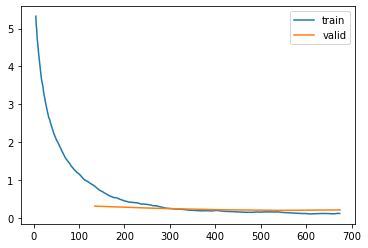

In [9]:
model.recorder.plot_loss()

## Testset Accuracy plot

In [ ]:
#model.recorder.after_epoch()
model.show_results()
model.fit_one_cycle(10, slice(5e-3,5e-2),cbs=[ShowGraphCallback()])

## Learning rate plot

lr is made constant on this training i.e 0.003

In [22]:
#model.recorder.plot_lr()
model.lr_find()

SuggestedLRs(lr_min=9.999999747378752e-07, lr_steep=7.585775847473997e-07)

## Confusion Matrix on a test-set

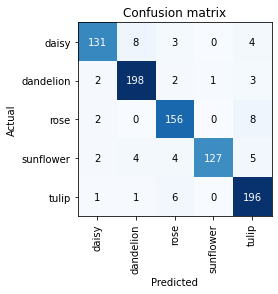

In [23]:
interp=ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(title='Confusion matrix')

### **Don't forget to give upvote if you like my work**